# Taller de Machine Learning con R

## Bloque 4: K-Nearest Neighbors

In [1]:
library('class')
library('caret')
library('e1071')
library('rpart.plot')
library('rpart')

Loading required package: lattice
Loading required package: ggplot2
Loading required package: rpart


Nuevamente descargar la base de datos de iris, cambiar las categorías de Species para setosa=0, versicolor=1 y virginica=2. Luego aleatorizar la base y generar 70% del set para entrenamiento y 30% para test.

Llamamos la librería correspondiente y verificamos.

In [2]:
library(datasets)
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
dim(iris)

[1] 150   5

Usamos plyr para cambiar las categorías de Species a numéricas

In [4]:
library('plyr')

In [6]:
factor(iris$Species)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2
Levels: 0 1 2

In [5]:
iris$Species<-revalue(factor(iris$Species),
      c('setosa'=0,'versicolor'=1,'virginica'=2))
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0


In [7]:
iris<-iris[sample(1:nrow(iris)),1:5]
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
66,6.7,3.1,4.4,1.4,1
59,6.6,2.9,4.6,1.3,1
85,5.4,3.0,4.5,1.5,1
49,5.3,3.7,1.5,0.2,0
150,5.9,3.0,5.1,1.8,2
53,6.9,3.1,4.9,1.5,1


In [8]:
train_prop<-0.7
test_prop<-0.3
train_size<-dim(iris)[1]*train_prop
test_size<-dim(iris)[1]*test_prop
train<-iris[1:train_size,]
test<-iris[test_size+1:test_size+test_size,]

In [9]:
tail(train)
print(dim(train))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
80,5.7,2.6,3.5,1.0,1
108,7.3,2.9,6.3,1.8,2
104,6.3,2.9,5.6,1.8,2
30,4.7,3.2,1.6,0.2,0
147,6.3,2.5,5.0,1.9,2
21,5.4,3.4,1.7,0.2,0


[1] 105   5


In [10]:
head(test)
print(dim(test))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
84,6.0,2.7,5.1,1.6,1
130,7.2,3.0,5.8,1.6,2
52,6.4,3.2,4.5,1.5,1
132,7.9,3.8,6.4,2.0,2
87,6.7,3.1,4.7,1.5,1
6,5.4,3.9,1.7,0.4,0


[1] 45  5


Vamos a proceder a usar las herramientas de KNN para crear un modelo de clasificación usando las 4 categorías. Primero descargamos y cargamos las paqueterías de caret y e1091

In [11]:
knnFit <- train(Species ~ ., data = train,
        trControl = trainControl(method = "none"), 
                method = "knn")

In [12]:
knnFit

k-Nearest Neighbors 

105 samples
  4 predictor
  3 classes: '0', '1', '2' 

No pre-processing
Resampling: None 

In [13]:
knnPredict <- predict(knnFit,newdata = test )

In [14]:
confusionMatrix(knnPredict, test$Species )

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2
         0 12  0  0
         1  0 11  3
         2  0  1 18

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No Information Rate : 0.4667          
    P-Value [Acc > NIR] : 3.526e-10       
                                          
                  Kappa : 0.863           
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            1.0000   0.9167   0.8571
Specificity            1.0000   0.9091   0.9583
Pos Pred Value         1.0000   0.7857   0.9474
Neg Pred Value         1.0000   0.9677   0.8846
Prevalence             0.2667   0.2667   0.4667
Detection Rate         0.2667   0.2444   0.4000
Detection Prevalence   0.2667   0.3111   0.4222
Balanced Accuracy      1.0000   0.9129   0.9077

In [15]:
dtfit = train(Species ~ ., data=train, 
              method="rpart",
              trControl = trainControl(method = "cv"))

In [16]:
dtfit

CART 

105 samples
  4 predictor
  3 classes: '0', '1', '2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 94, 94, 96, 94, 95, 94, ... 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa    
  0.0000000  0.9486869  0.9224396
  0.4090909  0.7412121  0.5962491
  0.5454545  0.4948485  0.2071429

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

In [17]:
dtPredict <- predict(dtfit,newdata = test )

In [18]:
confusionMatrix(dtPredict, test$Species )

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2
         0 12  0  0
         1  0 12  4
         2  0  0 17

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No Information Rate : 0.4667          
    P-Value [Acc > NIR] : 3.526e-10       
                                          
                  Kappa : 0.8649          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            1.0000   1.0000   0.8095
Specificity            1.0000   0.8788   1.0000
Pos Pred Value         1.0000   0.7500   1.0000
Neg Pred Value         1.0000   1.0000   0.8571
Prevalence             0.2667   0.2667   0.4667
Detection Rate         0.2667   0.2667   0.3778
Detection Prevalence   0.2667   0.3556   0.3778
Balanced Accuracy      1.0000   0.9394   0.9048

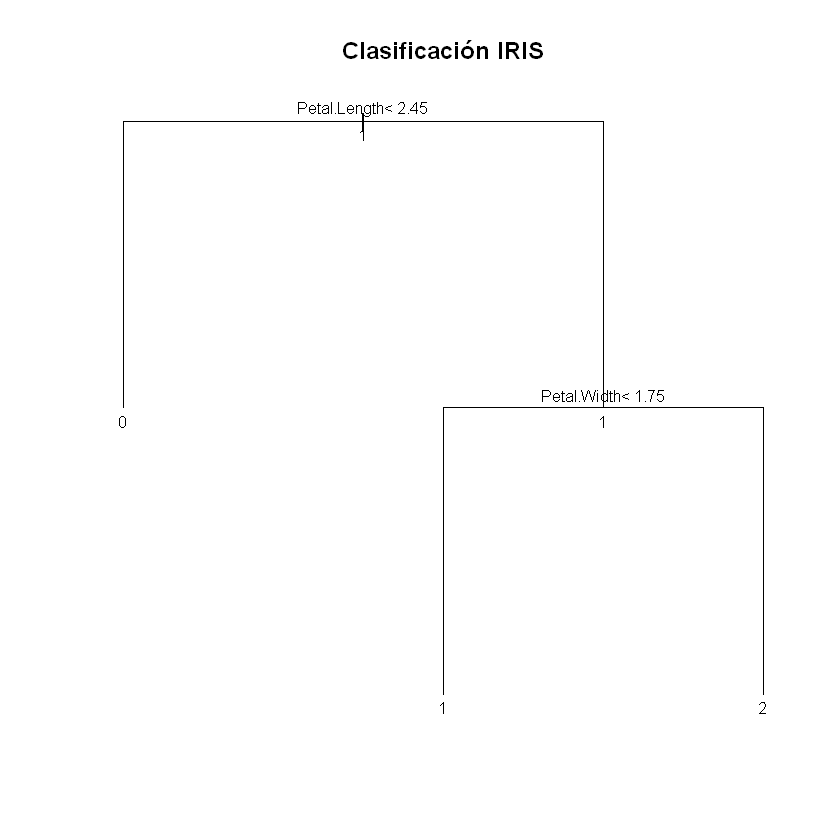

In [19]:
plot(dtfit$finalModel, uniform=TRUE,
     main="Clasificación IRIS")
text(dtfit$finalModel,all=TRUE, cex=.8)

In [20]:
dtfit2<-rpart(Species~., data=train, method='class')

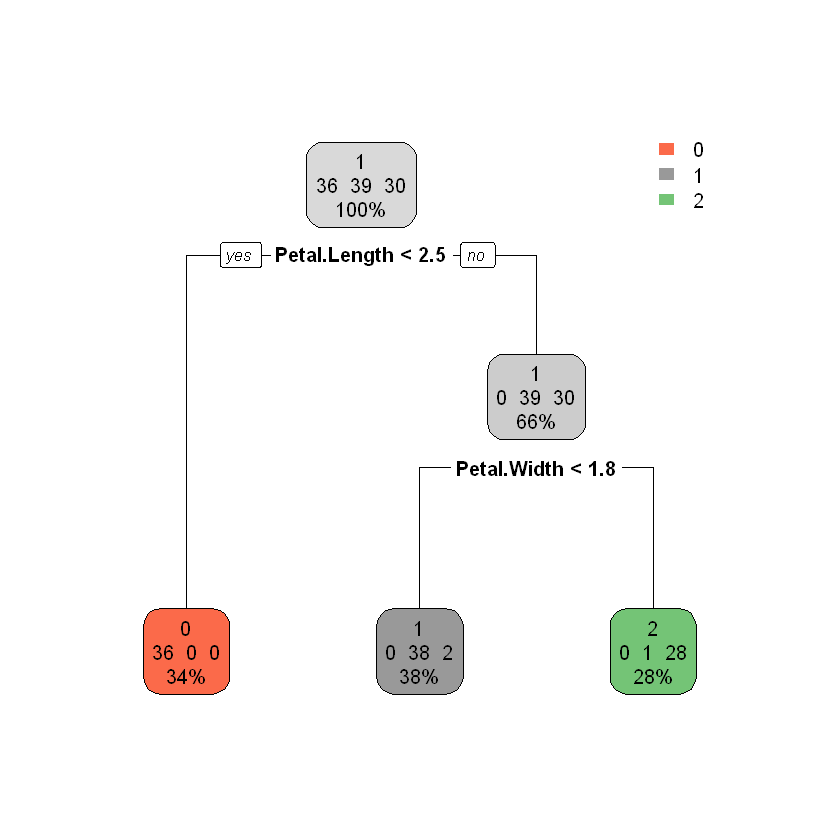

In [21]:
rpart.plot(dtfit2, extra = 101)